## Create a model in Tensorflow

### Sequential API

The Sequential API is a straightforward way to create models in Keras. It allows you to build a model layer by layer. Each layer has exactly one input tensor and one output tensor. It is called 'Sequential' because it allows you to sequentially stack layers in a neural network.

The Sequential API is easy to use because of its simplicity, but it's not suitable for creating more complex models. For example, it's not straightforward to create models that have multiple inputs or outputs, share layers, or have non-linear topology (like reusing the output from an earlier layer as the input for a later layer) using the Sequential API.

Here's an example of how to create a model using the Sequential API:

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10,)))
model.add(layers.Dense(1, activation='sigmoid'))

In this example, we first initialize a Sequential model. We then add a dense layer with 32 units and 'relu' activation function. The input_shape parameter is used to specify the shape of the input. The second layer is a Dense layer with 1 unit and a 'sigmoid' activation function.

### Functional API

The Functional API is a way to create models that are more complex than those that can be made with the Sequential API. It can handle models with multiple inputs or outputs, shared layers (the same layer called several times), and even non-linear topology (such as residual connections).

With Functional API, you work directly with the tensors and you can manipulate them as you wish. This is why it's called 'Functional' – it takes the input tensor and output tensor to define a model.

Here's an example of how to create a model using the Functional API:

In [11]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# This returns a tensor
inputs = Input(shape=(20,))

# A layer instance is callable on a tensor and returns a tensor
dense_layer = Dense(64, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(dense_layer)

# This creates a model that includes the Input layer and Dense layer
model = Model(inputs=inputs, outputs=outputs)


In this example, we first create an input tensor using Input() function. We then create a Dense layer that takes the input tensor as input. We do this again to create another Dense layer. Finally, we create our model by specifying the inputs and outputs in the Model function.

In summary, while the Sequential API is easier to use due to its simplicity, it's not suitable for creating complex models. The Functional API, on the other hand, is capable of creating complex models, but it requires a bit more work and understanding of how tensors work.

### Compile
The compile method is used to configure the learning process before training the model. It receives three important arguments:

- **Optimizer**: This is the algorithm that will be used to adjust the weights of the network to minimize the loss function. There are several optimizers available such as SGD, Adam, RMSProp, etc. They are usually specified by their string ID ('adam', 'sgd', etc.), but you can also pass an instance of the Optimizer class, which allows more customization.


In [12]:
# Using string ID
model.compile(optimizer='adam', loss='binary_crossentropy')

# Using instance for more customization
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')

- **Loss function**: This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (like 'categorical_crossentropy' or 'mse'), or it can be an objective function.

In [13]:
# For binary classification
model.compile(optimizer='adam', loss='binary_crossentropy')

# For multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy')

# For regression
model.compile(optimizer='adam', loss='mse')

- **Metrics**: These are the list of metrics to be evaluated during training and testing. Typically, you will use metrics=['accuracy']. To specify multiple metrics, pass them as a list: metrics=['accuracy', 'precision'].


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fit
The fit method does the training loop: forward pass, backward pass and weight update. It has several arguments:

- **x**: Input data. It could be a Numpy array (or array-like), a TensorFlow tensor, a dict mapping input names to the corresponding array/tensors, if the model has named inputs.

- **y**: Target data. Like the input data x, it could be a Numpy array (or array-like), a TensorFlow tensor, a dict mapping output names to the corresponding array/tensors, if the model has named outputs.

- **batch_size**: Number of samples per gradient update. If unspecified, batch_size will default to 32.

```python
model.fit(X_train, y_train, batch_size=64)
```

- **epochs**: Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

```python
model.fit(X_train, y_train, batch_size=64, epochs=10)
```

- **validation_split / validation_data**: Fraction of the training data to be used as validation data / Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.

```python
# Using validation_split
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

# Using validation_data
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_val, y_val))
```

### Evaluating the Model
After training, you can evaluate the performance of the model on the test data:

```python
loss, accuracy = model.evaluate(X_test, y_test)
```

## Activation Functions

Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction.

### Sigmoid Function `activation='sigmoid'`

The sigmoid function maps any value into a range between 0 and 1. It is useful in the output layer of a binary classification neural network, as it can be treated as a probability for the positive class.


Sigmoid function is often used in the output layer of a binary classification where we need probabilities to classify data into two categories.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

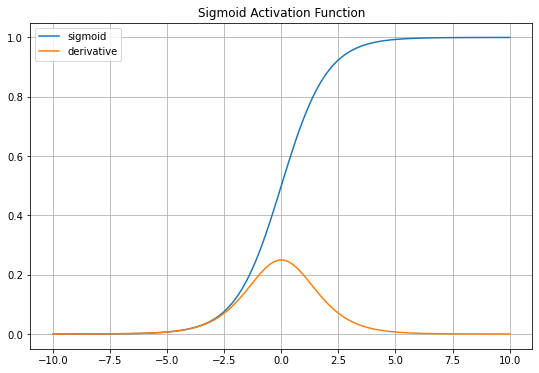

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
dy = sigmoid_derivative(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y, label='sigmoid')
plt.plot(x, dy, label='derivative')
plt.title('Sigmoid Activation Function')
plt.legend()
plt.grid(True)
plt.show()

### Hyperbolic Tangent function `activation='tanh'`

The tanh function maps any value into a range between -1 and 1. It is useful in hidden layers of a neural network as it can create strong negative, neutral, and positive activations.


Tanh is generally used in the hidden layers of a neural network as it can create strong negative, neutral, and positive activations.

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

$$
\tanh'(x) = 1 - \tanh^{2}(x)
$$

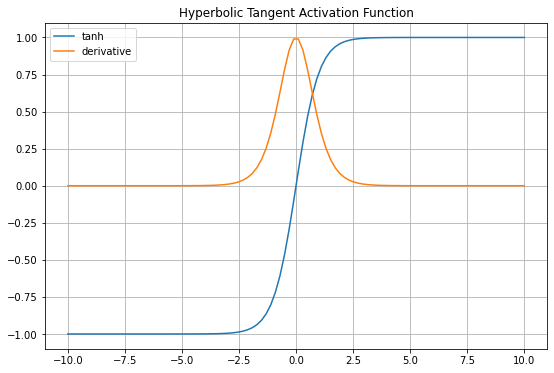

In [16]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - tanh(x)**2

y = tanh(x)
dy = tanh_derivative(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y, label='tanh')
plt.plot(x, dy, label='derivative')
plt.title('Hyperbolic Tangent Activation Function')
plt.legend()
plt.grid(True)
plt.show()


### Rectified Linear Unit (ReLU) `activation='relu'`


The ReLU function allows positive values to pass through directly, but clips negative values to zero. It is the most used activation function in convolutional neural networks (CNNs), where negative activations generally do not help with detecting features in an image.


ReLU is often used in the hidden layers of Neural Networks, especially in Convolutional Neural Networks.


$$
f(x) = \max(0, x)
$$

$$
f'(x) = 
  \begin{cases} 
    1 & \text{if } x > 0 \\
    0 & \text{otherwise} 
  \end{cases}
$$

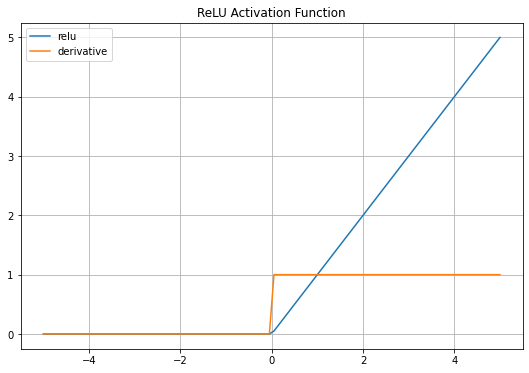

In [17]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

x = np.linspace(-5, 5, 100)
y = relu(x)
dy = relu_derivative(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y, label='relu')
plt.plot(x, dy, label='derivative')
plt.title('ReLU Activation Function')
plt.legend()
plt.grid(True)
plt.show()

###  Linear  `activation='linear'`


The ReLU function allows positive values to pass through directly, but clips negative values to zero. It is the most used activation function in convolutional neural networks (CNNs), where negative activations generally do not help with detecting features in an image.


ReLU is often used in the hidden layers of Neural Networks, especially in Convolutional Neural Networks.


$$
f(x) = x
$$

$$
f'(x) = 1
$$

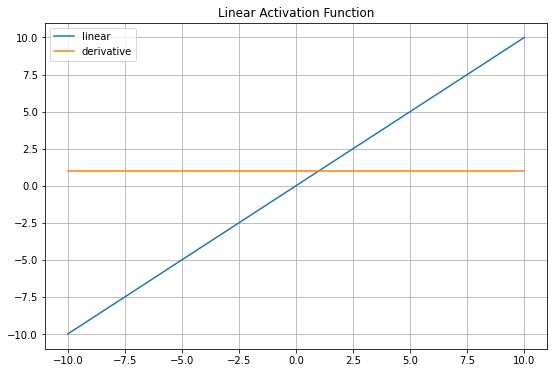

In [18]:
def linear(x):
    return x

def linear_derivative(x):
    return np.ones(x.shape)

x = np.linspace(-10, 10, 100)
y = linear(x)
dy = linear_derivative(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y, label='linear')
plt.plot(x, dy, label='derivative')
plt.title('Linear Activation Function')
plt.legend()
plt.grid(True)
plt.show()

### Softmax `activation='softmax'`


The softmax function is used for multiclass classification problems. It gives the probability distribution of the event over 'n' different events. In other words, it calculates the probabilities of each target class over all possible target classes.

The softmax function is generally used in the output layer of a classifier where we need to classify data into multiple categories.

$$
\text{softmax}(x_{i}) = \frac{e^{x_{i}}}{\sum_{j=1}^{K} e^{x_{j}}}
$$



## Loss Functions

Loss functions, also known as cost functions, are used to evaluate how well specific algorithm models the given data. If predictions deviate too much from actual results, loss function would cough up a very large number. Gradually, with the help of some optimization function, loss function learns to reduce the error in prediction.

### Regression Loss Functions

#### Mean Squared Error Loss
Mean Squared Error (MSE) is calculated by taking the average squared difference between the predicted and actual values. It's mainly used for regression problems.


$$
L(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}
$$

In TensorFlow, you can use MSE as your loss function like this:

```python
model.compile(optimizer='adam', loss='mean_squared_error')
````

#### Mean Absolute Error Loss
Mean Absolute Error (MAE) is calculated as the average of the absolute difference between the actual and predicted values.


$$
L(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}|y_{i} - \hat{y}_{i}|
$$

In TensorFlow, you can use MAE as your loss function like this:

```python
model.compile(optimizer='adam', loss='mean_absolute_error')
````

### Classification Loss Functions

#### Binary Cross-Entropy
Binary Cross-Entropy loss function is used for binary classification problems. It's defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.


$$
L(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n}[y_{i}\log(\hat{y}_{i}) + (1 - y_{i})\log(1 - \hat{y}_{i})]
$$
In TensorFlow, you can use Binary Cross-Entropy as your loss function like this:

```python
model.compile(optimizer='adam', loss='binary_crossentropy')
```

#### Categorical Cross-Entropy
Categorical Cross-Entropy is used for multi-class classification problems. It's defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.

$$
L(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{K}y_{ij}\log(\hat{y}_{ij})
$$

In TensorFlow, you can use Categorical Cross-Entropy as your loss function like this:

```python
model.compile(optimizer='adam', loss='categorical_crossentropy')
```

- **Categorical Cross-Entropy**
Categorical Cross-Entropy is used when the labels are provided as a one-hot encoded vector (i.e., an array where the index representing the class is set to 1 and the rest are set to 0). This is often the case when you have more than two classes and the classes are mutually exclusive.

For example, if you have three classes, A, B, and C, one-hot encoding of class A would be [1, 0, 0], class B would be [0, 1, 0] and class C would be [0, 0, 1].


```python
model.compile(optimizer='adam', loss='categorical_crossentropy')
````

- **Sparse Categorical Cross-Entropy**
Sparse Categorical Cross-Entropy is used when the labels are provided as integers, i.e., a single integer for each sample in the batch. This can be useful when dealing with large multi-class classification tasks with a lot of classes, as it saves memory by not having to store each class in a large one-hot encoded array.

For example, instead of one-hot encoding as described above, class A could be represented as 0, class B as 1, and class C as 2.


```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
```

In a nutshell, the choice between using Categorical Cross-Entropy and Sparse Categorical Cross-Entropy depends on the format of your labels. If you have one-hot encoded labels, use Categorical Cross-Entropy. If you have integer labels, use Sparse Categorical Cross-Entropy.



## Metrics

Metrics are functions used to evaluate the performance of your model. The choice of your metric function should align with the goal of your model.

### Regression Metrics
Mean Absolute Error (MAE)
Mean Absolute Error (MAE) is the average of the absolute differences between the actual and predicted values.

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{i} - \hat{y}_{i}|
$$

In TensorFlow, you can use MAE as your metric like this:

python
Copy code
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
Mean Squared Error (MSE)
Mean Squared Error (MSE) is the average of the squared differences between the actual and predicted values.


$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}
$$
In TensorFlow, you can use MSE as your metric like this:

python
Copy code
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

### Classification Metrics
- **Accuracy**
Accuracy is one of the most common classification metrics. It is defined as the proportion of correct predictions with respect to the targets.

$$
Accuracy = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$
In TensorFlow, you can use accuracy as your metric like this:

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```
- **Precision**
Precision is defined as the proportion of true positive predictions (i.e., the number of items correctly identified as positive out of total predicted positives).

$$
Precision = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$
In TensorFlow, you can use precision as your metric like this:

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['precision'])
```

- **Recall**
Recall (also known as sensitivity) is defined as the proportion of actual positives that are correctly identified.


$$
Recall = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
In TensorFlow, you can use recall as your metric like this:

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['recall'])
```

Please note that precision and recall are more informative than accuracy when dealing with imbalanced datasets.


## Metrics vs Loss Functions
In machine learning, both metrics and loss functions are used to quantify the performance of the model. However, they serve different purposes and are used in different contexts.

- **Loss Functions**: A loss function, also known as cost function, is used to optimize the machine learning model during training. It measures the inconsistency between predicted and actual values and the model tries to minimize this during training. It is this function that gets minimized by the optimization algorithm (such as Gradient Descent). For example, in a regression problem, Mean Squared Error (MSE) is often used as the loss function, while in a classification problem, Cross-Entropy is commonly used.

- **Metrics**: Metrics, on the other hand, are used to evaluate the performance of the model. These are the key performance indicators that you care about and want to track during training and testing but you don't necessarily optimize for these during training. For example, in a classification problem, you might care about accuracy, precision, recall, or F1-score, while in a regression problem, you might care about Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

### When to Use Metrics

Metrics are used when you want to monitor the performance of your model in terms that are understandable and interpretable in the context of the problem. They are not used to train the model but rather to gauge its performance on some validation data.

For example, if you are dealing with a binary classification problem, your loss function could be 'binary_crossentropy', but your metric could be 'accuracy', because while cross-entropy is a good measure for the model to optimize over, accuracy (the ratio of correct predictions to total predictions) is more interpretable for us.

In Keras, you can specify the metrics to use as a list of strings in the compile function:

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['recall', 'accuracy'])
```

In summary, metrics are used to understand the performance of the model during and after the training process, while loss functions are used by the optimization algorithm to train the model. It's important to choose both according to the problem at hand for effective model training and evaluation.

## Regularization Techniques in Deep Learning

Regularization is a technique used to prevent overfitting in a model. Overfitting occurs when the model performs well on the training data but poorly on the unseen data (like validation or test data). Regularization adds a penalty on the different parameters of the model to reduce the freedom of the model and in other words to avoid overfitting.

### L1 and L2 Regularization

L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

- L1 Regularization (Lasso Regression)
In L1, we shrink the parameters to zero, thus removing some features and making the model simpler and interpretable.

Here's the LaTeX code for L1 Regularization:

$$
L1 = \lambda \sum_{i=1}^{n} |w_{i}|
$$
In TensorFlow, you can add L1 regularization to your model like this:

```python
from tensorflow.keras import regularizers

model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l1(0.01)))
````

- L2 Regularization (Ridge Regression)
In L2, we shrink all the parameter weights to small and close to zero values, but it does not make them zero.

$$
L2 = \lambda \sum_{i=1}^{n} w_{i}^{2}
$$
In TensorFlow, you can add L2 regularization to your model like this:

```python
from tensorflow.keras import regularizers

model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)))
```
### Dropout
Dropout is a technique where randomly selected neurons are ignored during training, meaning that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass. It has the effect of reducing overfitting and improving model performance.

In TensorFlow, you can add dropout to your model like this:

```python
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.5))
```
In this case, approximately half (0.5) of the outputs from the previous layer will be dropped during training.

### Early Stopping
Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. These methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error.

In TensorFlow, you can apply early stopping to your model like this:

```python
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# And add early_stop to the list of callbacks in model.fit
model.fit(X_train, y_train, validation_split=0.2, callbacks=[early_stop])
```
In this case, training will stop when the validation loss has not improved after 5 epochs.



### Batch Normalization
Batch Normalization is a technique that helps to make artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling. It has been shown to have several benefits:


The idea behind Batch Normalization is to normalize the outputs of each layer for each training mini-batch.

$$
\mu_{B} = \frac{1}{m}\sum_{i=1}^{m}x_{i} % Mini-batch mean
$$


$$
\sigma_{B}^{2} = \frac{1}{m}\sum_{i=1}^{m}(x_{i} - \mu_{B})^{2} % Mini-batch variance
$$


$$
\hat{x}_{i} = \frac{x_{i} - \mu_{B}}{\sqrt{\sigma_{B}^{2} + \varepsilon}} % Normalize
$$


$$
y_{i} = \gamma\hat{x}_{i} + \beta = BN_{\gamma,\beta}(x_{i}) % Scale and shift
$$


```python
from tensorflow.keras.layers import BatchNormalization

model.add(BatchNormalization())
````

### Layer Normalization

Layer normalization is very similar to batch normalization, but with a few key differences. Most notably, unlike batch normalization, layer normalization performs exactly the same computation at training and test times.

While batch normalization computes a mean and variance for each entire mini-batch, layer normalization computes a mean and variance for each example independently.

Where layer normalization differs is that it normalizes across the features (it computes the mean and variance for each example independently). In other words, each feature vector corresponding to a single datapoint is normalized based on the sum of the features.

$$
\mu_{i} = \frac{1}{H}\sum_{h=1}^{H}x_{ih} % Feature mean
$$

$$
\sigma_{i}^{2} = \frac{1}{H}\sum_{h=1}^{H}(x_{ih} - \mu_{i})^{2} % Feature variance
$$

$$
\hat{x}_{ih} = \frac{x_{ih} - \mu_{i}}{\sqrt{\sigma_{i}^{2} + \varepsilon}} % Normalize
$$

$$
y_{ih} = \gamma\hat{x}_{ih} + \beta = LN_{\gamma,\beta}(x_{ih}) % Scale and shift
$$

```python
from tensorflow.keras.layers import LayerNormalization
model.add(LayerNormalization())
```


